# Machine Learning models to predict human emotions

In [226]:
# import required libraries
import numpy as np
import pandas as pd
import keras

# 1 Data Preprocessing

In [227]:
import os 

train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

for train_folder in train:
    count = 0

    # iterate through each emotion folder containing images
    for e in emotions:
        path = f'./{train_folder}/{e}'
        
        # count the number of files inside the folder
        file_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        count += file_count
        print(f'  {e}: {file_count}')

    print(f'files in {train_folder}: {count}')
    print()

  angry: 3995
  disgusted: 436
  fearful: 4097
  happy: 7215
  neutral: 4965
  sad: 4830
  surprised: 3171
files in train: 28709


In [228]:
# constants about our data
TRAIN_SIZE = 28709
IMAGE_LENGTH = 48

DATASET_SIZE = TRAIN_SIZE
IMAGE_PIXELS = IMAGE_LENGTH ** 2

In [229]:
import matplotlib.image as mpimg

# these are the directories that we read from
test_train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# initialize empty arrays; data for the pixels and different labels
data = np.empty((DATASET_SIZE, IMAGE_PIXELS))
tt_labels = np.empty(DATASET_SIZE, dtype=object)
emotion_labels = np.empty(DATASET_SIZE, dtype=object)

i = 0
for tt in test_train:
    for emotion in emotions:
        # iterate through all the folders
        directory = f'./{tt}/{emotion}'
        
        for filename in os.listdir(directory):
            fpath = os.path.join(directory, filename)
            
            # flatten the image into 1d and save it to our numpy data array
            data[i] = mpimg.imread(fpath).flatten() 

            emotion_labels[i] = emotion
            i += 1

In [230]:
data

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.59215689, 0.58823532, 0.57647061, ..., 0.75686276, 0.71764708,
        0.72156864],
       [0.45882353, 0.45490196, 0.44313726, ..., 0.18039216, 0.18431373,
        0.19215687],
       ...,
       [0.03921569, 0.0627451 , 0.07450981, ..., 0.68235296, 0.62352943,
        0.57647061],
       [0.5529412 , 0.58039218, 0.61176473, ..., 0.86666667, 0.85490197,
        0.85490197],
       [0.47058824, 0.47058824, 0.48627451, ..., 0.72549021, 0.70588237,
        0.71764708]])

In [231]:
from sklearn import preprocessing

# normalize/scale the data
data = preprocessing.scale(data)
data

array([[-0.6098823 , -0.45922178, -0.40324931, ..., -0.08629622,
        -0.05737478, -0.41127694],
       [ 0.37236206,  0.40461636,  0.41101772, ...,  1.03874271,
         0.89140539,  0.88666894],
       [-0.0399381 , -0.01496221, -0.01490662, ..., -0.86218512,
        -0.85229867, -0.83120063],
       ...,
       [-1.33747072, -1.24901664, -1.19246195, ...,  0.79304457,
         0.58369294,  0.41584547],
       [ 0.25109733,  0.37993528,  0.52376237, ...,  1.40082418,
         1.34015273,  1.31931754],
       [-0.00355868,  0.03439996,  0.1228924 , ...,  0.93529086,
         0.85294134,  0.87394398]])

In [232]:
# compile the numpy arrays into a dataframe
df = pd.DataFrame(data=data)
df['emotion'] = emotion_labels

In [233]:
train = df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,-0.609882,-0.459222,-0.403249,-0.507367,-0.672987,-0.666437,-0.641287,-0.610882,-0.759125,-0.734837,...,1.008915,1.011680,0.352092,-0.062565,0.067986,-0.216423,-0.086296,-0.057375,-0.411277,angry
1,0.372362,0.404616,0.411018,0.553296,0.503082,0.337040,0.055831,0.464802,0.889874,0.936669,...,-0.029926,-0.206637,-0.029433,-0.116214,-0.581221,0.778775,1.038743,0.891405,0.886669,angry
2,-0.039938,-0.014962,-0.014907,-0.162332,-0.411638,-0.733335,-0.955673,-1.016010,-1.057651,-1.109485,...,-1.068767,-0.968085,-0.915116,-0.907534,-0.859452,-0.858063,-0.862185,-0.852299,-0.831201,angry
3,0.469374,0.515681,0.385963,0.604412,0.751363,0.711671,0.807625,0.758170,0.889874,1.138403,...,-0.366848,-0.220482,0.052322,0.192266,0.293221,0.320460,0.353374,0.429837,0.161346,angry
4,1.621389,1.688033,1.751426,1.792866,1.639948,1.046163,0.575252,0.688321,-0.403737,-0.922161,...,1.514297,0.347143,-0.111188,-0.116214,0.346217,0.582354,0.456826,0.032375,-0.054978,angry


In [234]:
# 2. Data Preprocessing
# Separate features and labels on our datasets 
feature_cols = [x for x in range(48*48)]

X =  train[feature_cols]
y = train["emotion"]

In [235]:
y

0            angry
1            angry
2            angry
3            angry
4            angry
           ...    
28704    surprised
28705    surprised
28706    surprised
28707    surprised
28708    surprised
Name: emotion, Length: 28709, dtype: object

In [236]:
from sklearn.model_selection import train_test_split

SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [237]:
print(SVM_y_train.shape)
print(SVM_X_train.shape)

(22967,)
(22967, 2304)


In [238]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have your labels as a list or array
labels = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder on the labels
encoder.fit(y)

# Transform the labels to numerical representations
y_encoded = encoder.transform(y)

encoded_y_df = pd.DataFrame({'emotion': y_encoded})

encoded_y_df

,emotion
0,0
1,0
2,0
3,0
4,0
...,...
28704,6
28705,6
28706,6
28707,6


In [239]:

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y_df, test_size=0.3, random_state=2)

X_train_3D = X_train.values.reshape(20096, 48, 48, 1)
X_test_3D = X_test.values.reshape(8613, 48, 48, 1)

print(X_train.shape)
print(X_test.shape)

(20096, 2304)
(8613, 2304)


In [240]:
from keras import utils as np_utils

# OneHotEncoding for the output label:

y_train_cat = np_utils.to_categorical(y_train, 7)
y_test_cat = np_utils.to_categorical(y_test, 7)

# Label after OneHotEncoding:
print (y_train_cat.shape)
print (y_train_cat[:10, :])

(20096, 7)
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


# 2.1 Regular ANN

In [241]:
# "Sequential" models let us define a stack of neural network layers
from keras import Sequential
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten


input_size = 2304
hidden_neurons = 500
out_size = 7

ANN_model = Sequential()

# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = input_size))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# fourth layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# output layer: output layer:
ANN_model.add(Dense(out_size, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('softmax')) # Activation

# compile:
ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [242]:
fitted_ANN_model = ANN_model.fit(X_train, y_train_cat, validation_split=0.33, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
421/421 [==============================] - 5s 9ms/step - loss: 1.7196 - accuracy: 0.3147 - val_loss: 1.6653 - val_accuracy: 0.3293
Epoch 2/25
421/421 [==============================] - 4s 9ms/step - loss: 1.6353 - accuracy: 0.3559 - val_loss: 1.6525 - val_accuracy: 0.3486
Epoch 3/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5819 - accuracy: 0.3757 - val_loss: 1.5820 - val_accuracy: 0.3788
Epoch 4/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5371 - accuracy: 0.3997 - val_loss: 1.5868 - val_accuracy: 0.3747
Epoch 5/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4859 - accuracy: 0.4209 - val_loss: 1.6017 - val_accuracy: 0.3748
Epoch 6/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4272 - accuracy: 0.4474 - val_loss: 1.5796 - val_accuracy: 0.3809
Epoch 7/25
421/421 [==============================] - 4s 9ms/step - loss: 1.3741 - accuracy: 0.4682 - val_loss: 1.5988 - val_accuracy: 0.3827
Epoch 

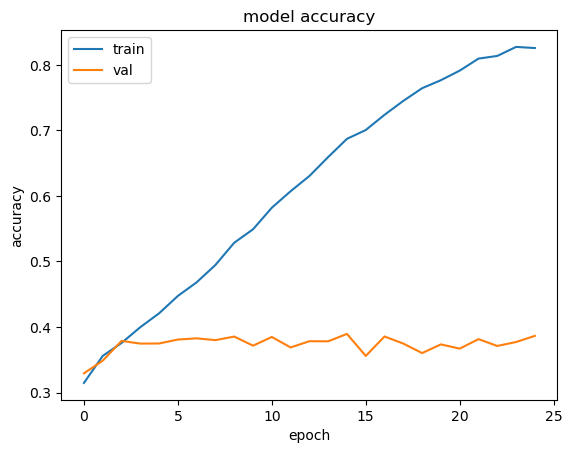

In [243]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fitted_ANN_model.history['accuracy'])
plt.plot(fitted_ANN_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [244]:
# Prediction:
y_predict = ANN_model.predict(X_test, verbose=1)
print (y_predict.shape)

270/270 [==============================] - 1s 2ms/step
(8613, 7)


In [245]:
score = ANN_model.evaluate(X_test, y_test_cat, verbose=1)
print('The accuracy is: ', score[1])

270/270 [==============================] - 1s 2ms/step - loss: 2.8459 - accuracy: 0.3833
The accuracy is:  0.3832578659057617


# 2.2 Convolution Neural Network (CNN)

In [246]:
import tensorflow as tf

from keras import layers, models
from keras.optimizers import Adam

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_LENGTH, IMAGE_LENGTH, 1)))

model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(48, activation='relu'))
model_cnn.add(layers.Dense(7)) 

In [247]:
model_cnn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 flatten_9 (Flatten)         (None, 28224)             0         
                                                                 
 dense_46 (Dense)            (None, 48)                1354800   
                                                                 
 dense_47 (Dense)            (None, 7)                 343       
                                                     

In [248]:
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_3D, y_train, epochs=10,
                            validation_data=(X_test_3D, y_test))

Epoch 1/10
628/628 [==============================] - 11s 17ms/step - loss: 1.5454 - accuracy: 0.4041 - val_loss: 1.4289 - val_accuracy: 0.4619
Epoch 2/10
628/628 [==============================] - 11s 17ms/step - loss: 1.2852 - accuracy: 0.5144 - val_loss: 1.3569 - val_accuracy: 0.4948
Epoch 3/10
628/628 [==============================] - 11s 17ms/step - loss: 1.0815 - accuracy: 0.5986 - val_loss: 1.3334 - val_accuracy: 0.5024
Epoch 4/10
628/628 [==============================] - 11s 17ms/step - loss: 0.8462 - accuracy: 0.6890 - val_loss: 1.4313 - val_accuracy: 0.5034
Epoch 5/10
628/628 [==============================] - 11s 17ms/step - loss: 0.5807 - accuracy: 0.7929 - val_loss: 1.6087 - val_accuracy: 0.4959
Epoch 6/10
628/628 [==============================] - 11s 17ms/step - loss: 0.3592 - accuracy: 0.8775 - val_loss: 2.0954 - val_accuracy: 0.4898
Epoch 7/10
628/628 [==============================] - 11s 17ms/step - loss: 0.2038 - accuracy: 0.9369 - val_loss: 2.5574 - val_accuracy:

In [271]:
# Access the final accuracy from the history object
train_accuracy = history_cnn.history['accuracy'][-1]
val_accuracy = history_cnn.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")

Final Training Accuracy: 0.9726313948631287
Final Validation Accuracy: 0.47927552461624146


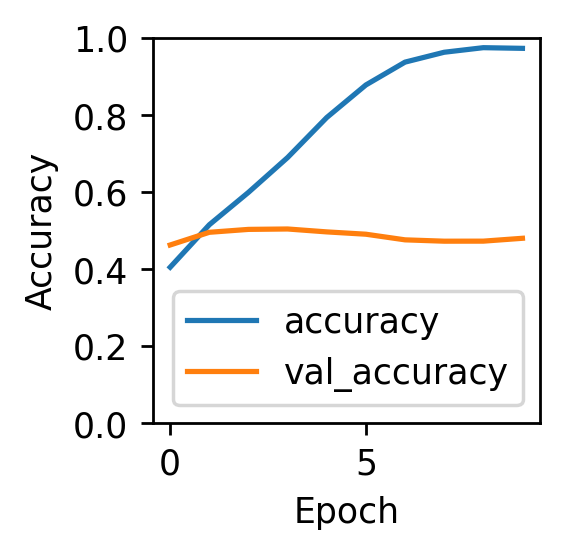

In [249]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# 2.3 SVM Model

In [250]:
from  sklearn.decomposition  import  PCA

k = 100
pca = PCA(n_components=k)

# new datasets for after PCA
X_train_pca = pca.fit_transform(SVM_X_train)
X_test_pca = pca.fit_transform(SVM_X_test)

In [251]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
svm = svm.fit(X_train_pca, SVM_y_train)

In [252]:
y_predict_SVM = svm.predict(X_test_pca)

In [253]:
from sklearn.metrics import accuracy_score

print('Accuracy for SVM: ' + str(accuracy_score(SVM_y_test, y_predict_SVM)))

Accuracy for SVM: 0.21839080459770116


# 2.4 VGG-16 Model

In [254]:
X_train_vgg16 = []
X_test_vgg16 = []
# need to resize to use the VGG16 from keras
# since our data is black and white, we copy the pixel values 3 times
for img in X_train_3D:
    X_train_vgg16.append(np.repeat(img,3,axis = -1))
for img in X_test_3D:
    X_test_vgg16.append(np.repeat(img,3,axis = -1))
X_train_vgg16 = np.array(X_train_vgg16)
X_test_vgg16 = np.array(X_test_vgg16)

In [255]:
X_train_vgg16.shape

(20096, 48, 48, 3)

In [256]:
from keras.src.applications import VGG16

# Load the pre-trained VGG16 model
model_16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the pre-trained model so that they are not trained again during fine-tuning
for layer in model_16.layers:
    layer.trainable = False

new_model = models.Sequential()
new_model.add(model_16)
# new_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [257]:
history_vgg16 = new_model.fit(X_train_vgg16, y_train_cat, epochs=10, 
                    validation_data=(X_test_vgg16, y_test_cat))

Epoch 1/10
628/628 [==============================] - 89s 140ms/step - loss: 1.6687 - accuracy: 0.3388 - val_loss: 1.5762 - val_accuracy: 0.3864
Epoch 2/10
628/628 [==============================] - 87s 139ms/step - loss: 1.5687 - accuracy: 0.3882 - val_loss: 1.5390 - val_accuracy: 0.4057
Epoch 3/10
628/628 [==============================] - 88s 140ms/step - loss: 1.5286 - accuracy: 0.4054 - val_loss: 1.5248 - val_accuracy: 0.4145
Epoch 4/10
628/628 [==============================] - 88s 141ms/step - loss: 1.5014 - accuracy: 0.4187 - val_loss: 1.5133 - val_accuracy: 0.4131
Epoch 5/10
628/628 [==============================] - 90s 143ms/step - loss: 1.4747 - accuracy: 0.4298 - val_loss: 1.4952 - val_accuracy: 0.4220
Epoch 6/10
628/628 [==============================] - 90s 143ms/step - loss: 1.4536 - accuracy: 0.4395 - val_loss: 1.4961 - val_accuracy: 0.4264
Epoch 7/10
628/628 [==============================] - 89s 142ms/step - loss: 1.4285 - accuracy: 0.4503 - val_loss: 1.4882 - val_ac

In [269]:
# Access the final accuracy from the history object
train_accuracy = history_vgg16.history['accuracy'][-1]
val_accuracy = history_vgg16.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")

Final Training Accuracy: 0.47397491335868835
Final Validation Accuracy: 0.43504005670547485


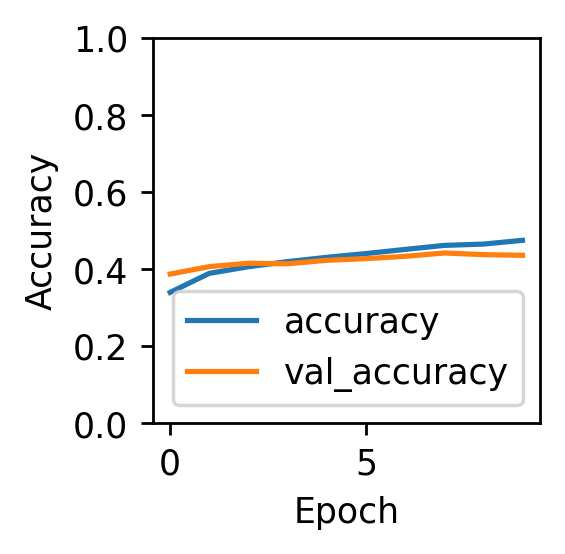

In [258]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [259]:
test_loss, test_acc = new_model.evaluate(X_test_vgg16, y_test_cat, verbose=2)

270/270 - 25s - loss: 1.4808 - accuracy: 0.4350 - 25s/epoch - 92ms/step


# 2.5 LeNet

In [260]:
# LeNet5 Model
model_LeNet = keras.Sequential()

model_LeNet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Flatten())

model_LeNet.add(layers.Dense(units=120, activation='relu'))
model_LeNet.add(layers.Dense(units=84, activation='relu'))
model_LeNet.add(layers.Dense(units=10, activation = 'softmax'))

In [261]:
model_LeNet.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 46, 46, 6)         60        
                                                                 
 average_pooling2d_4 (Avera  (None, 23, 23, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 16)        880       
                                                                 
 average_pooling2d_5 (Avera  (None, 10, 10, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_50 (Dense)            (None, 120)             

In [262]:
model_LeNet.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'], run_eagerly=True)

In [263]:
history_LeNet = model_LeNet.fit(X_train_3D, y_train, epochs=10, 
                    validation_data=(X_test_3D, y_test))

Epoch 1/10
628/628 [==============================] - 24s 39ms/step - loss: 1.6632 - accuracy: 0.3482 - val_loss: 1.5763 - val_accuracy: 0.3956
Epoch 2/10
628/628 [==============================] - 24s 38ms/step - loss: 1.4815 - accuracy: 0.4279 - val_loss: 1.4838 - val_accuracy: 0.4179
Epoch 3/10
628/628 [==============================] - 24s 38ms/step - loss: 1.3766 - accuracy: 0.4713 - val_loss: 1.4429 - val_accuracy: 0.4400
Epoch 4/10
628/628 [==============================] - 24s 38ms/step - loss: 1.2916 - accuracy: 0.5056 - val_loss: 1.3935 - val_accuracy: 0.4605
Epoch 5/10
628/628 [==============================] - 24s 38ms/step - loss: 1.2194 - accuracy: 0.5345 - val_loss: 1.3563 - val_accuracy: 0.4774
Epoch 6/10
628/628 [==============================] - 24s 38ms/step - loss: 1.1428 - accuracy: 0.5696 - val_loss: 1.3631 - val_accuracy: 0.4886
Epoch 7/10
628/628 [==============================] - 24s 38ms/step - loss: 1.0715 - accuracy: 0.5960 - val_loss: 1.3695 - val_accuracy:

In [268]:
# Access the final accuracy from the history object
train_accuracy = history_LeNet.history['accuracy'][-1]
val_accuracy = history_LeNet.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")

Final Training Accuracy: 0.6967058181762695
Final Validation Accuracy: 0.48531290888786316


Text(0.5, 1.0, 'Training and Validation Accuracy')

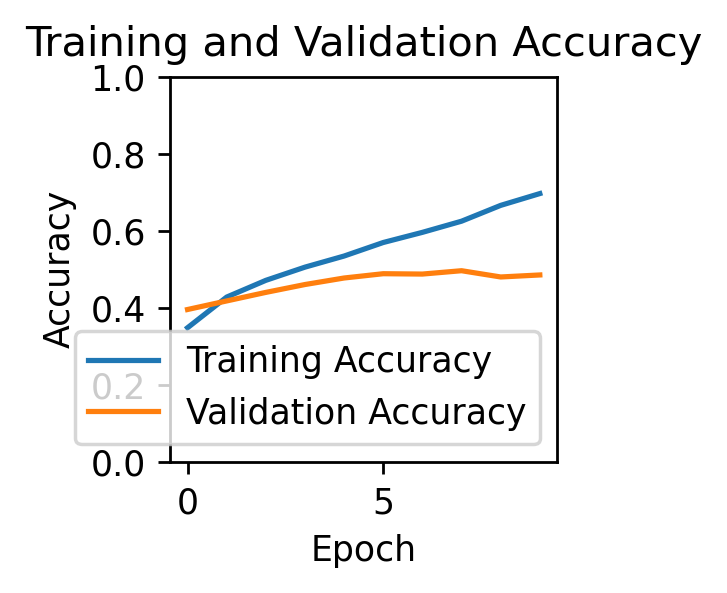

In [270]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_LeNet.history['accuracy'], label='Training Accuracy')
plt.plot(history_LeNet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')